In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
human_annotations = pd.read_csv("../survey_imgs_data/annotations/rating_matrix_with_dominant_emotion.csv")
retinaface_pred = pd.read_csv("../survey_imgs_data/predictions/retinaface_data_distribution.csv")
yolov8_pred = pd.read_csv("../survey_imgs_data/predictions/yolov8_data_distribution.csv")
mtcnn_pred = pd.read_csv("../survey_imgs_data/predictions/mtcnn_data_distribution.csv")

img_num = human_annotations['image_id']
human_majority = human_annotations['dominant_emotion']
retinaface_majority = retinaface_pred['emotion_classified']
yolov8_majority = yolov8_pred['emotion_classified']
mtcnn_majority = mtcnn_pred['emotion_classified']

# Create the DataFrame properly
majority_table = pd.DataFrame({
    'Image ID': img_num,
    'Human': human_majority,
    'RetinaFace': retinaface_majority,
    'YOLOv8': yolov8_majority,
    'MTCNN': mtcnn_majority
})

print(majority_table.to_string())

     Image ID     Human RetinaFace    YOLOv8     MTCNN
0           1   neutral    neutral   neutral   neutral
1           2   neutral        sad   neutral   neutral
2           3   neutral       fear   neutral      fear
3           4   neutral    neutral   neutral   neutral
4           5       sad    neutral       sad   neutral
5           6   neutral        sad       sad       sad
6           7   disgust       fear       sad      fear
7           8   neutral        sad       sad   neutral
8           9   neutral       fear      fear      fear
9          10     happy       fear      fear      fear
10         11  surprise      angry      fear      fear
11         12   neutral       fear      fear       sad
12         13   neutral       fear     happy     happy
13         14   neutral      happy     happy     happy
14         15   neutral    neutral     happy   neutral
15         16   neutral       fear     happy     happy
16         17  surprise    neutral     angry   neutral
17        

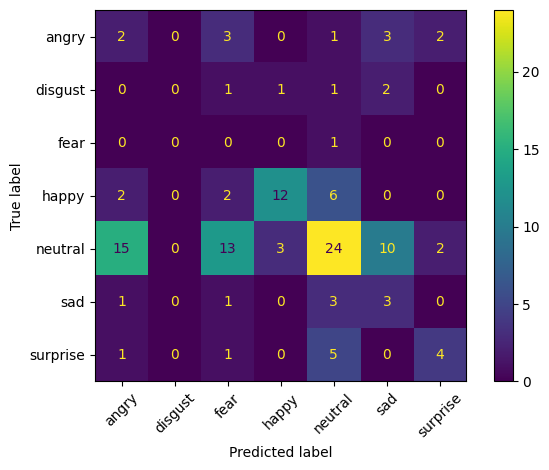

In [3]:
annotated = majority_table['Human']
predicted = majority_table['RetinaFace']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(annotated.unique()).union(set(predicted.unique()))))

# Compute the confusion matrix
cm = confusion_matrix(annotated, predicted, labels=labels)

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()  # Optional: add color for better visualization
plt.xticks(rotation=45)
#plt.title("RetinaFace vs Annotations")
plt.tight_layout()
plt.show()

In [4]:
accuracy = accuracy_score(annotated, predicted)
precision = precision_score(annotated, predicted, average='macro', zero_division=0)
recall = recall_score(annotated, predicted, average='macro', zero_division=0)
f1_score_val = f1_score(annotated, predicted, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 0.360000
Precision: 0.299610
Recall: 0.260588
F1-Score: 0.264692


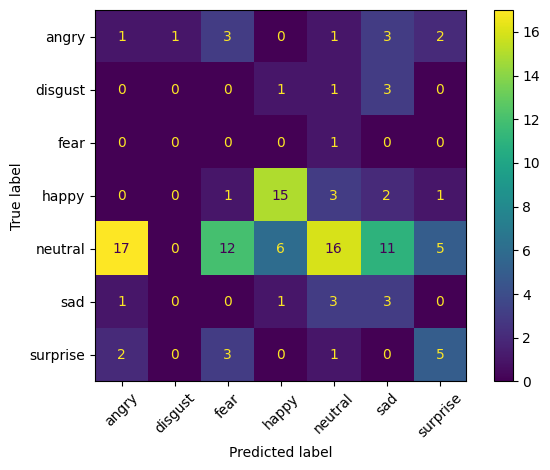

In [5]:
annotated = majority_table['Human']
predicted = majority_table['YOLOv8']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(annotated.unique()).union(set(predicted.unique()))))

# Compute the confusion matrix
cm = confusion_matrix(annotated, predicted, labels=labels)

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()  # Optional: add color for better visualization
plt.xticks(rotation=45)
#plt.title("YOLOv8 vs Annotations")
plt.tight_layout()
plt.show()

In [6]:
accuracy = accuracy_score(annotated, predicted)
precision = precision_score(annotated, predicted, average='macro', zero_division=0)
recall = recall_score(annotated, predicted, average='macro', zero_division=0)
f1_score_val = f1_score(annotated, predicted, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 0.320000
Precision: 0.262308
Recall: 0.263011
F1-Score: 0.241417


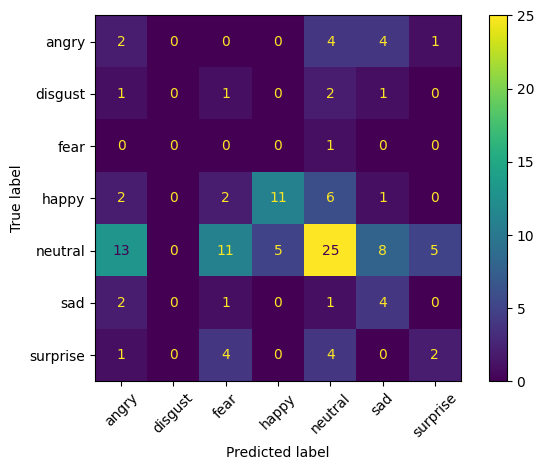

In [7]:
annotated = majority_table['Human']
predicted = majority_table['MTCNN']

# Get unique sorted labels to ensure consistency in the confusion matrix
labels = sorted(list(set(annotated.unique()).union(set(predicted.unique()))))

# Compute the confusion matrix
cm = confusion_matrix(annotated, predicted, labels=labels)

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()  # Optional: add color for better visualization
plt.xticks(rotation=45)
#plt.title("MTCNN vs Annotations")
plt.tight_layout()
plt.show()

In [8]:
accuracy = accuracy_score(annotated, predicted)
precision = precision_score(annotated, predicted, average='macro', zero_division=0)
recall = recall_score(annotated, predicted, average='macro', zero_division=0)
f1_score_val = f1_score(annotated, predicted, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 0.352000
Precision: 0.262337
Recall: 0.248110
F1-Score: 0.239530
